### Instructions
Please be patient while waiting for the environment to load; it may take a few minutes. 
Once the notebook has finished loading, in the top bar, select `Kernel`--> `Restart & Run All`. 
Once cell has finished running, you should see a plot with sliders appear at the bottom.
Enjoy!

In [1]:
# Import dependecies
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)      # Ignore warnings
import sys
sys.path.append('python/')                # Define path for libraries
import numpy as np
import matplotlib.pyplot as plt 
import downloadSPARCdata as dsd           # Import library to download data files
from IPython.display import Javascript, display, clear_output
import widget_SPARC as widget              # Import widget library
import importlib                           # Import library to reload widget

# SPARC Database - Rotation Curve for 175 Galaxies

In this interactive notebook, download rotation curve data for 175 galaxies to your computer from the Spitzer Photometry & Accurate Rotation Curves (SPARC) database. The downloaded data contains the rotational velocity measurements of the disk, the gas, and in some cases the bulge component, as well as the measured rotation of the stars in the galaxy. The program then calculates a "missing mass" or dark matter component to account for the measured rotation. Using an interactive tool (widget), you can change the contribution of each component and see how the total curve changes for the chosen galaxy.

### Download SPARC data files

You may either download and unzip the data files yourself or have Python do the work. 

#### Option 1. Download and unzip the data files yourself:
1. Go to http://astroweb.cwru.edu/SPARC/ and under "BASIC SPARK DATA", download the Rotmod_LTG.zip file for "Newtonian Mass Models".
2. Open (extract/unzip) the zip file to preferably the same location as where your Python notebook is located, in the directory: data/sparc. 
3. Make a note of the directory (file location) of the SPARC file of your galaxy with respect to this location of this python notebook. For example, if your file is located in the same location as this code, leave the following cell as is. But if it is, say, in the next folder "up" from this one, use the extension '../'. So an example of if the SPARC file is located two folders then one folder "down" (into a different folder named, say, 'otherfolder'), you would write:
`SPARC_file_directory='../../otherfolder/'` in the cell below and run it.

In [2]:
SPARC_file_directory='data/sparc/'                 #note that '' means the string variable is blank

#### Option 2. Let Python download and unzip the data files
1. By clicking the YES button, you can download and unzip SPARC data files to your computer. 

In [3]:
print("Would you like to download and unzip SPARC data files to your computer?")
dsd.displaybuttons

Would you like to download and unzip SPARC data files to your computer?


### Choose a galaxy

Select any galaxy from the dropdown menu.

In [4]:
galaxylist = ['NGC5005']                 # default list of galaxies  
def on_change(change):                   # add selected galaxynames to the list
    if change['type'] == 'change' and change['name'] == 'value':
        galaxylist.append(change['new'])
        display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))
dsd.dropdownmenu.observe(on_change)
display(dsd.galaxyoptions)

Box(children=(Box(children=(Label(value='Galaxy: '), Dropdown(index=79, options=('CamB', 'D512-2', 'D564-8', '…

Once you selected a galaxy, click on the cell below &#8595; &#8595; &#8595; , then select `Run` &#8594; `Run Selected Cell and All Below` to reveal the rotation curve and the image of the chosen galaxy in the following cells. 

In [15]:
# Writing the chosen galaxy name in a text file would allow us to use the selection in libraries outside of this notebook
chosengalaxy = galaxylist[-1]              # define the last element of the list as the selected galaxy
textfile = open("python/chosengalaxy.txt", "w")
textfile.write(chosengalaxy)
textfile.close()
textfile = open("python/chosengalaxy.txt", "r")
textfile.close()

### Interactive rotation curve widget

The interactive rotation curve widget displays the rotation curve of the selected galaxy, its distance to us in megaparsec, and the reduced chi-squared value from the fitting of a total rotation curve to the measured data. You can then adjust the contribution from each component using the slider. In some cases, the bulge prefactor slider is inactive because there is no bulge velocity data in the database for that galaxy. 

__Slider key__<br>
>_Bulge and Disk Prefactor_: Multiplier for the bulge and the disk component. This will change the contribution of each. <br>
_Halo Core Radius (in kiloparsec)_: The radius where we expect the Dark Matter density to decrease drastically, i.e. the size of the core. <br>
_Halo Central Mass Density (in solar mass/$kiloparsec^3$)_: The predicted density of the Dark Matter at the center of the galaxy. <br>
Click on the orange `Best Fit` button if you wish to reset the widget to the calculated best fit. 

In [16]:
importlib.reload(widget)                   # Reload widget library so the changes take effect
clear_output()

In [17]:
# Widget Output
widget.VBox([widget.button,widget.out,widget.interactive_plot(widget.widgetfunction)])

The "Best fit" of each galaxy was calculated using the __lmfit__ Python package. The fit statistics of this best fit is shown below.

__Fit statistics key__:<br>
>_bpref_: Bulge prefactor <br>
_dpref_: Disk prefactor <br>
_rc_: Dark Matter halo core radius <br>
_rho0_: Dark Matter halo central mass density <br>
It is important to note that the _value_ indicates the calculated best value for each parameter. 

In [18]:
# Show fit statistics
widget.fit

### Image of galaxy

The image of the selected galaxy from the DSS Survey is shown below. We acknowledge the use of NASA's _SkyView_ facility (http://skyview.gsfc.nasa.gov) located at NASA Goddard Space Flight Center.

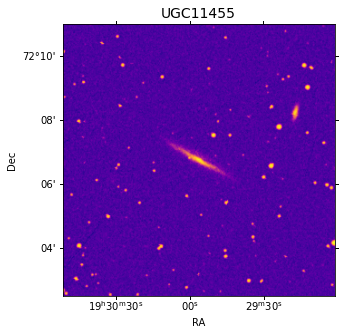

In [19]:
widget.GalaxyImage(chosengalaxy)

### References <br>
>Jimenez, Raul, Licia Verde, and S. Peng Oh. **Dark halo properties from rotation curves.** _Monthly Notices of the Royal Astronomical Society_ 339, no. 1 (2003): 243-259. https://doi.org/10.1046/j.1365-8711.2003.06165.x. <br><br>
>Lelli, Federico, Stacy S. McGaugh, and James M. Schombert. **SPARC: Mass Models for 175 Disk Galaxies with Spitzer Photometry and Accurate Rotation Curves.** _The Astronomical Journal 152_, no. 6 (2016): 157. https://doi.org/10.3847/0004-6256/152/6/157. <br><br>
>Matt Newville, Renee Otten, Andrew Nelson, Antonino Ingargiola, Till Stensitzki, Dan Allan, Austin Fox, Faustin Carter, Michał, Ray Osborn, Dima Pustakhod, lneuhaus, Sebastian Weigand, Glenn, Christoph Deil, Mark, Allan L. R. Hansen, Gustavo Pasquevich, Leon Foks, … Arun Persaud. (2021). **lmfit/lmfit-py: 1.0.3 (1.0.3).** Zenodo. https://doi.org/10.5281/zenodo.5570790. <br><br>
>McGlynn, T., Scollick, K., White, N., **SkyView: The Multi-Wavelength Sky on the Internet**, McLean, B.J. et al., New Horizons from Multi-Wavelength Sky Surveys, Kluwer Academic Publishers, 1998, IAU Symposium No. 179, p465